# Logistic regression

## Libraries

In [1]:
import numpy as np
import pandas as pd

from scipy.special import expit

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
%matplotlib inline

## Data

In [2]:
df = pd.read_csv('Grades.csv')

In [3]:
X = np.c_[df.Midterm_Grade]
y = df.Pass_Fail

The data set contains data from a class. For each student it reprots the midterm grade and if the student did pass (`y=1`) or fail (`y=0`) the class.

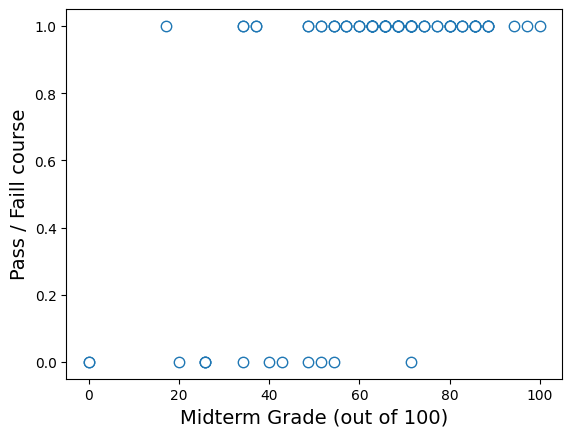

In [4]:
plt.plot(df.Midterm_Grade, df.Pass_Fail, ".", markersize=15, markerfacecolor='white')
plt.xlabel('Midterm Grade (out of 100)', fontsize=14)
plt.ylabel('Pass / Faill course', fontsize=14)
plt.show()

## Logistic regression training

Logistic regression is implemented with the [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) class.

In [5]:
clf = LogisticRegression()
clf.fit(X, y)

LogisticRegression()

Once trained, it is possible to make predictions as with other trained models from scikit-learn. To predict the probabilities one can use the [`expit`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.expit.html) function from SciPy like so:

In [13]:
X_fit = np.linspace(-5, 105, 100)
loss = expit(np.c_[X_fit] * clf.coef_ + clf.intercept_)

This predicts the positive probability (in our case the probability to pass the class as the class `y==1` is the case where the student did pass the class)

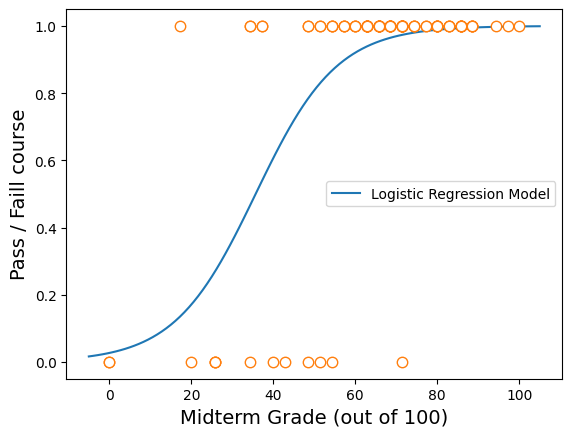

In [14]:
plt.plot(X_fit, loss, label="Logistic Regression Model")
plt.plot(df.Midterm_Grade, df.Pass_Fail, ".", markersize=15, markerfacecolor='white')
plt.xlabel('Midterm Grade (out of 100)', fontsize=14)
plt.ylabel('Pass / Faill course', fontsize=14)
plt.legend(loc="best")
plt.show()

Alternatively one can use the [`predict_proba`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.predict_proba) method of the `LogisticRegression` class

This method returns, for each class, the probability that the given instance is classified as the corresponding class. For example, to classify the instance `x=80` (the student got 60% on the midterm exam):

In [25]:
clf.predict_proba([[60]])

array([[0.07959273, 0.92040727]])

Two probabilities are returned as we have two classes (pass or fail the course). To know in which order the probabilities are shown one can inspect the `classes_` attribute, which lists the classes used by the trained model:

In [15]:
clf.classes_

array([0, 1])

In our case it means the first class is `y==0` (fail the course) and the second one is `y==1` (pass the course) and the corresponding probabilities are:

In [26]:
print("Probability to fail the course: ", clf.predict_proba([[60]])[0, 0])
print("Probability to pass the course: ", clf.predict_proba([[60]])[0, 1])

Probability to fail the course:  0.07959273194255445
Probability to pass the course:  0.9204072680574455


## Model evaluation

To evaluate the model one can use the confusion matrix:

In [12]:
confusion_matrix(y, clf.predict(X), normalize='all')

array([[0.07692308, 0.06593407],
       [0.03296703, 0.82417582]])

## Suggested activities and critical thinking

* Make some predictions for different midterm grades
* The model seems quite accurate for predicting examples where the student will pass the course (82%). Is this really true? Or is there another reason for this? <br>
*Hint: Is the data set balanced? Or is there some bias in it? What is the consequence?*